#**Introdução a Análise Exploratória dos Dados (EDA)**

Este notebook tem como propósito realizar uma análise exploratória da base de dados fictícia do ENEM 2023 (enem_2023.json).
O nosso objetivo é compreender os resultados por meio de técnicas estatísticas e visuais, proporcionando insights e uma base sólida para análises mais avançadas.


**Metodologia:**

* **Análise de Frequência:** Exploraremos a distribuição dos dados para identificar
padrões e tendências.
* **Análise de Dispersão:** Aplicaremos medidas estatísticas para compreender a variabilidade dos resultados.
* **Matriz de Correlação:** Investigaremos as relações entre diferentes variáveis para destacar possíveis associações.
* **Simulação de Ingresso:** Simularemos um processo de ingresso no curso de Ciências da Computação na UFRGS, considerando pesos específicos para cada disciplina.
* **Visualização de Quartis e Outliers:** Utilizaremos gráficos para visualizar a distribuição estatística, destacando quartis e identificando possíveis outliers.
* **Tratamento de Dados Nulos:** Abordaremos a identificação e correção de valores nulos para assegurar a qualidade dos dados.

Nota: Ressaltamos que os dados utilizados são fictícios, e a simulação de ingresso é baseada na suposição do peso de cada disciplina.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
import json
import requests
# pip install requests

url = "https://import.cdn.thinkific.com/401289/gQbVuYr9TaimUX9dQAqV_enem_2023.json"

response = requests.get(url) # Realiza a requisição GET para obter o conteúdo do JSON

json_data = response.json()    # O conteúdo do JSON estará em response.json()
df = pd.DataFrame(json_data)

df.reset_index(drop=True, inplace=True)
df.head(3)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem


### Conhecendo os dados

In [23]:
# Informações de colunas e tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [5]:
df.isna().sum() ## Dados faltantes

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [24]:
# Verificando o tamanho da base de dados

print(f'A base de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

A base de dados possui 1000 linhas e 6 colunas.


O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dataset existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

### **Análise de Dispersão, Variabilidade e Distribuição de Dados**

In [6]:
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


```
Count: Número total de observações no conjunto de dados.
Mean: Representa o valor médio das observações.
Std: Indica o quanto os valores estão afastados da média.
Min: Indica o valor mais baixo no conjunto de dados.
%25 (Q1): Representa o valor abaixo do qual 25% dos dados estão.
%50 (Q2): O valor do meio quando os dados estão ordenados.
%75 (Q3): Representa o valor abaixo do qual 75% dos dados estão.
Max: Representa o valor mais alto no conjunto de dados.
```

### Aplicação de Medidas Estatísticas

*	**Variância:**  Medida que quantifica o quão
dispersos estão os valores de um conjunto de dados em relação à média.
*	**Amplitude:** Diferença entre o maior e o menor valor em um conjunto de dados. Ela fornece uma visão geral da extensão total dos dados.
*	**Desvio Padrão:** Medida de dispersão que expressa a dispersão dos dados, calculada como a raiz quadrada da variância.
* **Coeficiente de variação (CV)**: Mede a variabilidade relativa em relação à média.
* **Skewness (Assimetria)**: Descreve a inclinação e a direção da distribuição dos dados.

*Obs.: Se skewness for zero, os dados são perfeitamente simétricos. Valores positivos indicam uma cauda à direita, enquanto valores negativos indicam uma cauda à esquerda.*

Adicionando no describe as colunas de amplitude e coeficiente de variação.


In [25]:
df_describe = df.describe()

df_describe.loc["amp"] = df_describe.loc['max'] - df_describe.loc['min']
df_describe.loc["cv"] = (df_describe.loc['std'] / df_describe.loc['mean']).abs() * 100  # abs para garantir que estamos falando de um valor positivo]
df_describe.loc["skewness"] = df.skew()

df_describe.round(2)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.00,936.00,824.00,924.00,860.00
mean,514.52,527.04,499.32,535.97,637.78
std,84.01,77.81,78.76,86.65,115.34
min,287.00,289.90,314.40,319.80,270.84
25%,458.36,475.42,444.71,479.17,556.47
50%,515.05,524.52,500.48,533.25,635.27
75%,571.64,581.40,548.75,592.91,715.99
max,804.46,763.92,802.00,807.88,1000.00
amp,517.46,474.02,487.60,488.08,729.16
cv,16.33,14.76,15.77,16.17,18.08


#### **<font color='f9e79f'> Conclusões: </font>**


*  **Coeficiente de variação (cv)** médio (15-35%): Dados apresentam uma variabilidade moderada, dispersão razoável em relação à média.
*   **Amplitute** alta das notas; sendo a maior delas para a disciplina 'Redação' com a amplitude de 729.
* Ambos, **mínimos** e **máximos** valores também registrados para a disciplina 'Redação'.
* Em **count** conseguimos ver a presença de dados nan, ou seja, informações ausentes em todas as disciplinas.
* Distribuições provavelmente simétricas, a **média (mean)** e a **mediana(50%)** são bem semelhantes.
* A **assimetria (skewness)** é bem próxima a zero, comprovando que os dados são simétricos. Portanto, apresentam assimetria nula.

#### **<font color='f9e79f'> Questão 1: </font>**  
Qual a maior amplitude de notas?

In [8]:
amplitude = novo_describe(df).loc["amp"]

print(f'A maior amplitude de notas foi de {amplitude.max()} para a disciplina {amplitude.idxmax()}.') ## valor máximo com o índice máximo

A maior amplitude de notas foi de 729.16 para a disciplina Redação.


### Gráfico de Barras por Gênero

Distribuição de frequência relativa (%) por variável de gênero.

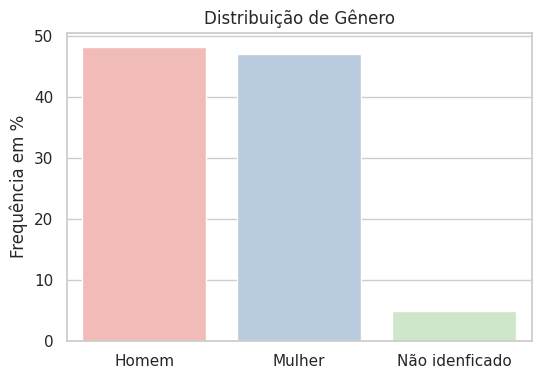

In [10]:
plt.figure(figsize=(6, 4))

sns.set(style='whitegrid')
sns.barplot(x=df['Sexo'].value_counts(normalize=True).index, ## index dos gêneros
                 y=df['Sexo'].value_counts(normalize=True)*100, ## calculo da frequência relativa
                 palette='Pastel1')

plt.title('Distribuição de Gênero')
plt.xlabel('')
plt.ylabel('Frequência em %')

plt.show()

### Histograma das Variáveis

Distribuição de frequência para todas as disciplinas.

#### **<font color='f9e79f'> Questão 2: </font>**
Qual a distribuição de frequência das disciplinas? Vamos descobrir juntos?

<Figure size 640x480 with 0 Axes>

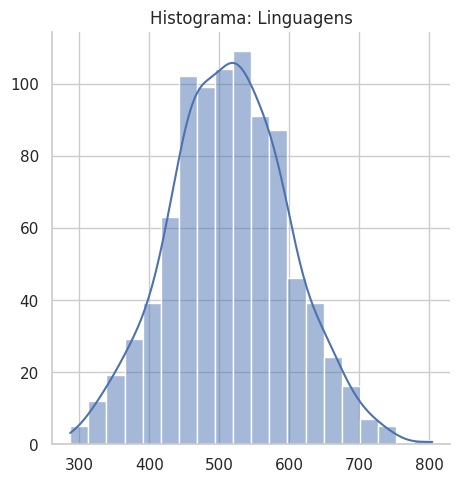

<Figure size 640x480 with 0 Axes>

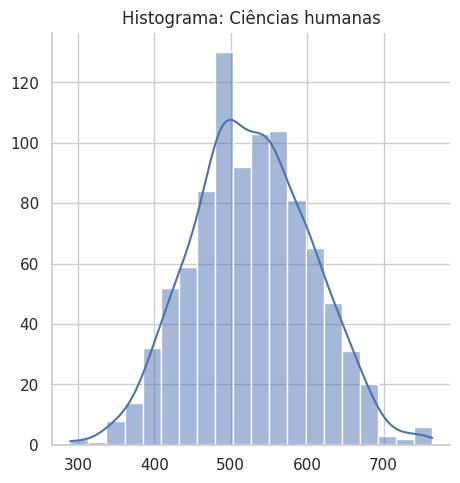

<Figure size 640x480 with 0 Axes>

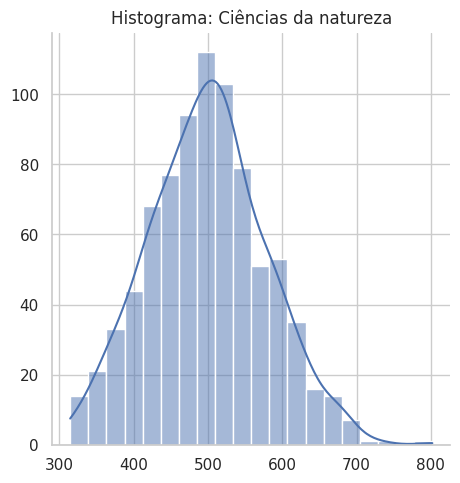

<Figure size 640x480 with 0 Axes>

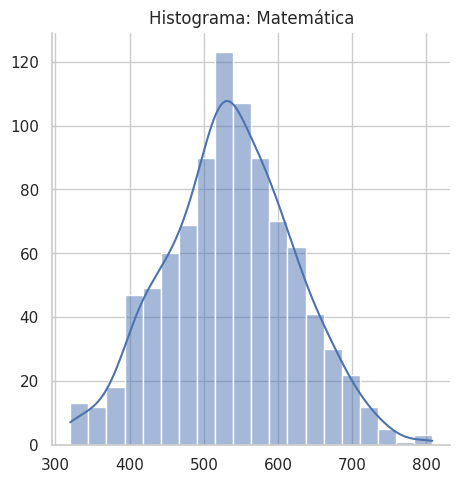

<Figure size 640x480 with 0 Axes>

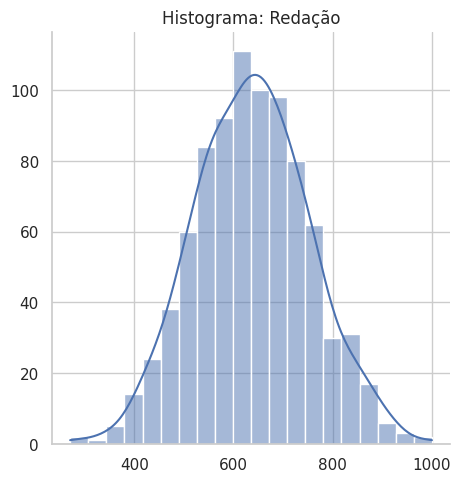

In [28]:
disciplinas = df.select_dtypes(include=np.number).columns

sns.set(style='whitegrid')
# para cada uma das colunas numericas roda o histograma
for disciplina in disciplinas:
    plt.figure()
    sns.displot(data=df, x=disciplina, bins=20, kde= True, color='b') # kde= True é a curva de densidade
    plt.title("Histograma: "+disciplina)
    plt.xlabel('')  # Remove o rótulo do eixo x
    plt.ylabel('')

plt.show()

Verificando a simetria dos histogramas.

In [29]:
from scipy.stats import skew

# nesse caso as áreas são proporcionais ou iguais as frequências

def calcular_assimetria(df_column):
    df_sem_nan = df_column.dropna()
    skewness = skew(df_sem_nan)

    if skewness > 0.5:
        return 'Assimetria à Direita (positiva)'
    elif -0.5 <= skewness <= 0.5:
        return 'Assimetria nula ou próxima de zero'
    else:
        return 'Assimetria à Esquerda (negativa)'

# utilizando método for para percorrer em cada disciplina
for disciplina in disciplinas:
    resultado = calcular_assimetria(df[disciplina])
    print(f"O resultado da assimetria de Pearson para a disciplina '{disciplina}' é: {resultado}")

## Ambos os histrogramas são simétricos, baseados no Coeficiente de assimetria de Pearson. Se o coeficiente for nulo ou próximo a zero, a distribuição será simétrica.

O resultado da assimetria de Pearson para a disciplina 'Linguagens' é: Assimetria nula ou próxima de zero
O resultado da assimetria de Pearson para a disciplina 'Ciências humanas' é: Assimetria nula ou próxima de zero
O resultado da assimetria de Pearson para a disciplina 'Ciências da natureza' é: Assimetria nula ou próxima de zero
O resultado da assimetria de Pearson para a disciplina 'Matemática' é: Assimetria nula ou próxima de zero
O resultado da assimetria de Pearson para a disciplina 'Redação' é: Assimetria nula ou próxima de zero


### Matriz de Correlação

#### **<font color='f9e79f'> Questão 3: </font>**
Existe correlação entre as disciplinas?

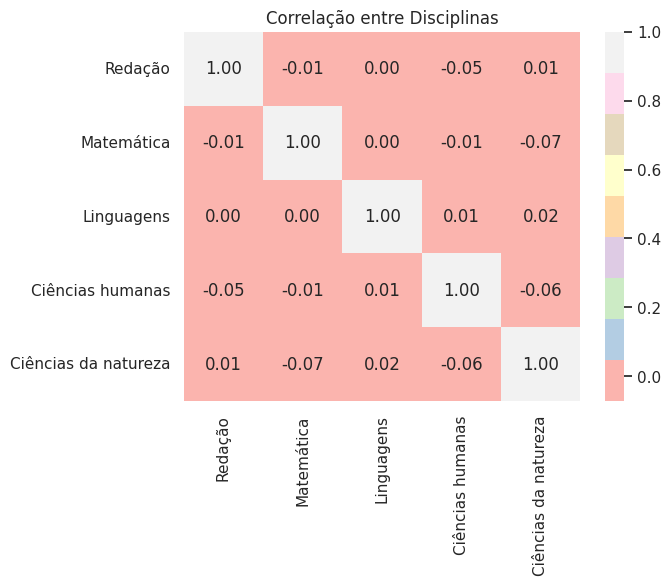

In [13]:
# Validando correlação entre disciplinas

correlacao_disciplinas = df[disciplinas].corr()
sns.heatmap(correlacao_disciplinas, annot=True,cmap='Pastel1', fmt='.2f')

plt.title('Correlação entre Disciplinas')
plt.show()

#### **<font color='f9e79f'> Conclusões: </font>**
Não demonstram correlação significativa.

### **<font color='f9e79f'>Vamos supor que o nosso objetivo é ingressar no curso de Ciências da Computação da UFRGS</font>**

Iremos então retirar informações da base de dados do enem do ano anterior para alinhar melhor as nossas estratégias de estudo.

Considere o peso cada uma das disciplinas conforme abaixo:

```
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
```

#### **<font color='f9e79f'> Questão 4: </font>**
Se existissem apenas 10 vagas para o curso de Ciências da Computação, qual a média ponderada, por disciplinas, dos prováveis estudantes aprovados?

In [14]:
# definindo os pesos
pesos = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

# calculando a média ponderada para todas as disciplinas
ponderadas = np.average(df[disciplinas], weights=[pesos[d] for d in disciplinas], axis=1)

# adicionando a média ponderada ao df para o curso de ciências da computação
df_ciencias_comp = df.copy()
df_ciencias_comp['Média Ponderada'] = ponderadas

# selecionando os 10 estudantes mais bem colocados
df_ciencias_comp.nlargest(10, 'Média Ponderada').mean().round(2)

Linguagens              543.0
Ciências humanas        571.0
Ciências da natureza    505.0
Matemática              721.0
Redação                 783.0
Média Ponderada         661.0
dtype: float64

E qual a média dos 10 melhores estudante sem considerar as notas ponderadas?

In [ ]:
df.nlargest(10, disciplinas).mean().round(2)

### Boxplot para Visualização de Outliers

O nosso código tem muitos outliers? Vamos verificar se é possível enxergá-los através de um boxplot.

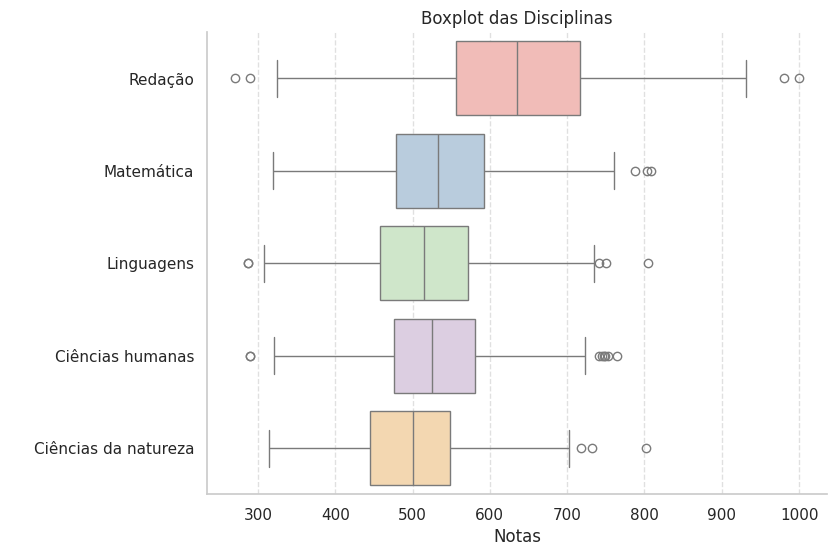

In [26]:
# Configurando o estilo do seaborn
sns.set(style='whitegrid')

# Boxplot para ambas disciplinas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[disciplinas], orient='h', palette='Pastel1')

# Adicionando título e rótulos aos eixos
plt.title('Boxplot das Disciplinas')
plt.xlabel('Notas')
plt.ylabel(' ')

# Otimizando visual
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

#### **<font color='f9e79f'> Questão 5: </font>**
Quantos outliers temos por disciplina?  

In [16]:
def outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = []

    for value in df[column].values:
        if ((value < lower) or (value > upper)):
            outliers.append(value)
    print(f'Disciplina: {column}, o número de outliers encontrados foi: ', len(outliers))

# Chamando a função outlier para cada disciplina
for disciplina in disciplinas:
    outlier(df, disciplina)

Disciplina: Redação, o número de outliers encontrados foi:  4
Disciplina: Matemática, o número de outliers encontrados foi:  3
Disciplina: Linguagens, o número de outliers encontrados foi:  5
Disciplina: Ciências humanas, o número de outliers encontrados foi:  8
Disciplina: Ciências da natureza, o número de outliers encontrados foi:  3


#### **<font color='f9e79f'> Conclusões: </font>**
O que podemos ver com o boxplot acima?

*   **Box:** Representa o intervalo interquartil (IQR), que é a faixa entre o primeiro quartil (25%) e o terceiro quartil (75%) dos dados.
A caixa em si indica onde está a maior parte dos dados.
* **Linha Mediana:** Dentro da caixa, há uma linha que representa a mediana (50%) dos dados.
* **Whiskers:** São linhas que se estendem a partir da caixa até os pontos fora dela. Eles indicam a variabilidade além do IQR.
* **Outliers:** Pontos fora dos whiskers são considerados outliers e são indicados individualmente.   

### Tratamento de Dados Nulos

#### **<font color='f9e79f'> Questão 6: </font>**

Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas (média, moda ou mediana). Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [17]:
df.mean()

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [18]:
df.std()

Linguagens               84.009313
Ciências humanas         77.811519
Ciências da natureza     78.760404
Matemática               86.648100
Redação                 115.339972
dtype: float64

In [19]:
# substituindo dados nulos por 'média'

def fillna_mean(df):
    for column in df.select_dtypes(include=np.number):
        df[column] = df[column].fillna(df[column].mean())

    df_mean = df.mean()
    df_std = df.std()
    return print(f"Média sem dados nulos:\n{df_mean}\n\nDesvio padrão sem dados nulos:\n{df_std}")

df_nan_mean = df.copy()
fillna_mean(df_nan_mean)

Média sem dados nulos:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Desvio padrão sem dados nulos:
Linguagens               79.560718
Ciências humanas         75.277806
Ciências da natureza     71.486677
Matemática               83.286987
Redação                 106.953175
dtype: float64


In [20]:
# substituindo dados nulos por 'mediana'

def fillna_median(df):
    for column in df.select_dtypes(include=np.number):
        df[column] = df[column].fillna(df[column].median())

    df_mean = df.mean()
    df_std = df.std()
    return print(f"Média sem dados nulos:\n{df_mean}\n\nDesvio padrão sem dados nulos:\n{df_std}")

df_nan_median = df.copy()
fillna_median(df_nan_median)

Média sem dados nulos:
Linguagens              514.578415
Ciências humanas        526.880850
Ciências da natureza    499.520391
Matemática              535.759100
Redação                 637.432194
dtype: float64

Desvio padrão sem dados nulos:
Linguagens               79.560876
Ciências humanas         75.280340
Ciências da natureza     71.488051
Matemática               83.290104
Redação                 106.956723
dtype: float64


In [21]:
# substituindo dados nulos por 'moda'

def fillna_mode(df):
    for column in df.select_dtypes(include=np.number):
        df[column] = df[column].fillna(df[column].mode())

    df_mean = df.mean()
    df_std = df.std()
    return print(f"Média sem dados nulos:\n{df_mean}\n\nDesvio padrão sem dados nulos:\n{df_std}")

df_nan_mode = df.copy()
fillna_mode(df_nan_mode)

Média sem dados nulos:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.815381
dtype: float64

Desvio padrão sem dados nulos:
Linguagens               84.009313
Ciências humanas         77.811519
Ciências da natureza     78.760404
Matemática               86.648100
Redação                 114.038611
dtype: float64


**<font color='f9e79f'> Resposta: </font>** Identificamos que a substituição dos dados nulos pela *moda* mostra-se mais efetiva, alterando menos os indicadores de média e desvio padrão dos dados.